<h1> Making Inferences about who survives Shipwrecks (featuring, the Titanic) </h1>

<h4> By: James Magee, Benjamin Nguyen, Shubham Sharma, Nav Thukral </h4>

<br>

<h2> Introduction </h2>

Our project is inspired by the Kaggle "Titanic" tutorial-competition where competitors are tasked with developing a Machine Learning model that classifies titanic passengers into the survivor and non-survivor classes based on other information about the passengers, pertaining to their voyage on the Titanic. Although we will not be building a classification model, the general problem of predicting who would and wouldn't survive naturally leads to some inference and hypothesis-testing questions, such as: is the mean ticket-fare of survivors different than the mean ticket-fare of non-survivors? More historical information about the titanic can be found on the <a href=https://en.wikipedia.org/wiki/Titanic>Titanic Wikipedia page.</a>

The dataset can be found here: <a href="https://www.kaggle.com/competitions/titanic/data?select=train.csv">Titanic - Machine Learning from Disaster</a>. The dataset contains the records for a sample of both survivors and casualties. Of the information in each record, we are interested in:

- `Survived`: This variable tells us if the passenger survived or not. We will use the value of this variable to select our two samples, the survivor sample and casualty sample.
    - A value of 0 denotes no.
    - A value of 1 denotes yes.
- `Sex`: This is the second variable we will use for our analysis. As the name suggests, this variable determines the sex of the passenger. This variable is the source of our first parameter: <u>the proportion male</u>. 
- `Fare`: This variable is the cost of the ticket paid by the person associated with a record. This is the source of our second parameter: <u>the mean fare</u>. 

**Objective**

For each of our two parameters, we will compare them across the survivor and casualty (henceforth "non-survivor") samples. To compare them rigorously, we will use a 2-sample t-test for comparing the mean fare, and a 2-sample difference-of-proportions to compare the proportion male.


<br>

<h2> Preliminary Results </h2>

<h4> Loading libraries and data wrangling </h4>

In [75]:
#import necessary libraries, suppressing messages
suppressMessages(library(tidyverse))
suppressMessages(library(readr))
suppressMessages(library(tidyr))
suppressMessages(library(dbplyr))
suppressMessages(library(ggplot2))

#set seed to ensure reproducibility of results
set.seed(9999)

In [76]:
#read in the data
titanic_df <- read_csv("https://raw.githubusercontent.com/pgbenng/stat-201-2022w2-group-30/main/train.csv", show_col_types= FALSE)
head(titanic_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


We can see that the training data contains 891 observations and 12 variables, with NA values in some columns (we won't be using these columns, though). Even though the data is already in the tidy format, we will select the Age, Survived, and Sex columns.


In [87]:
# Rename columns to be lowercase
names(titanic_df) <- tolower(names(titanic_df))

# Select the columns that will be used
titanic_df <- titanic_df |>
    select("sex", "fare", "survived") |>
    mutate(survived = as.factor(survived))

<h4>Plots and Estimates</h4>

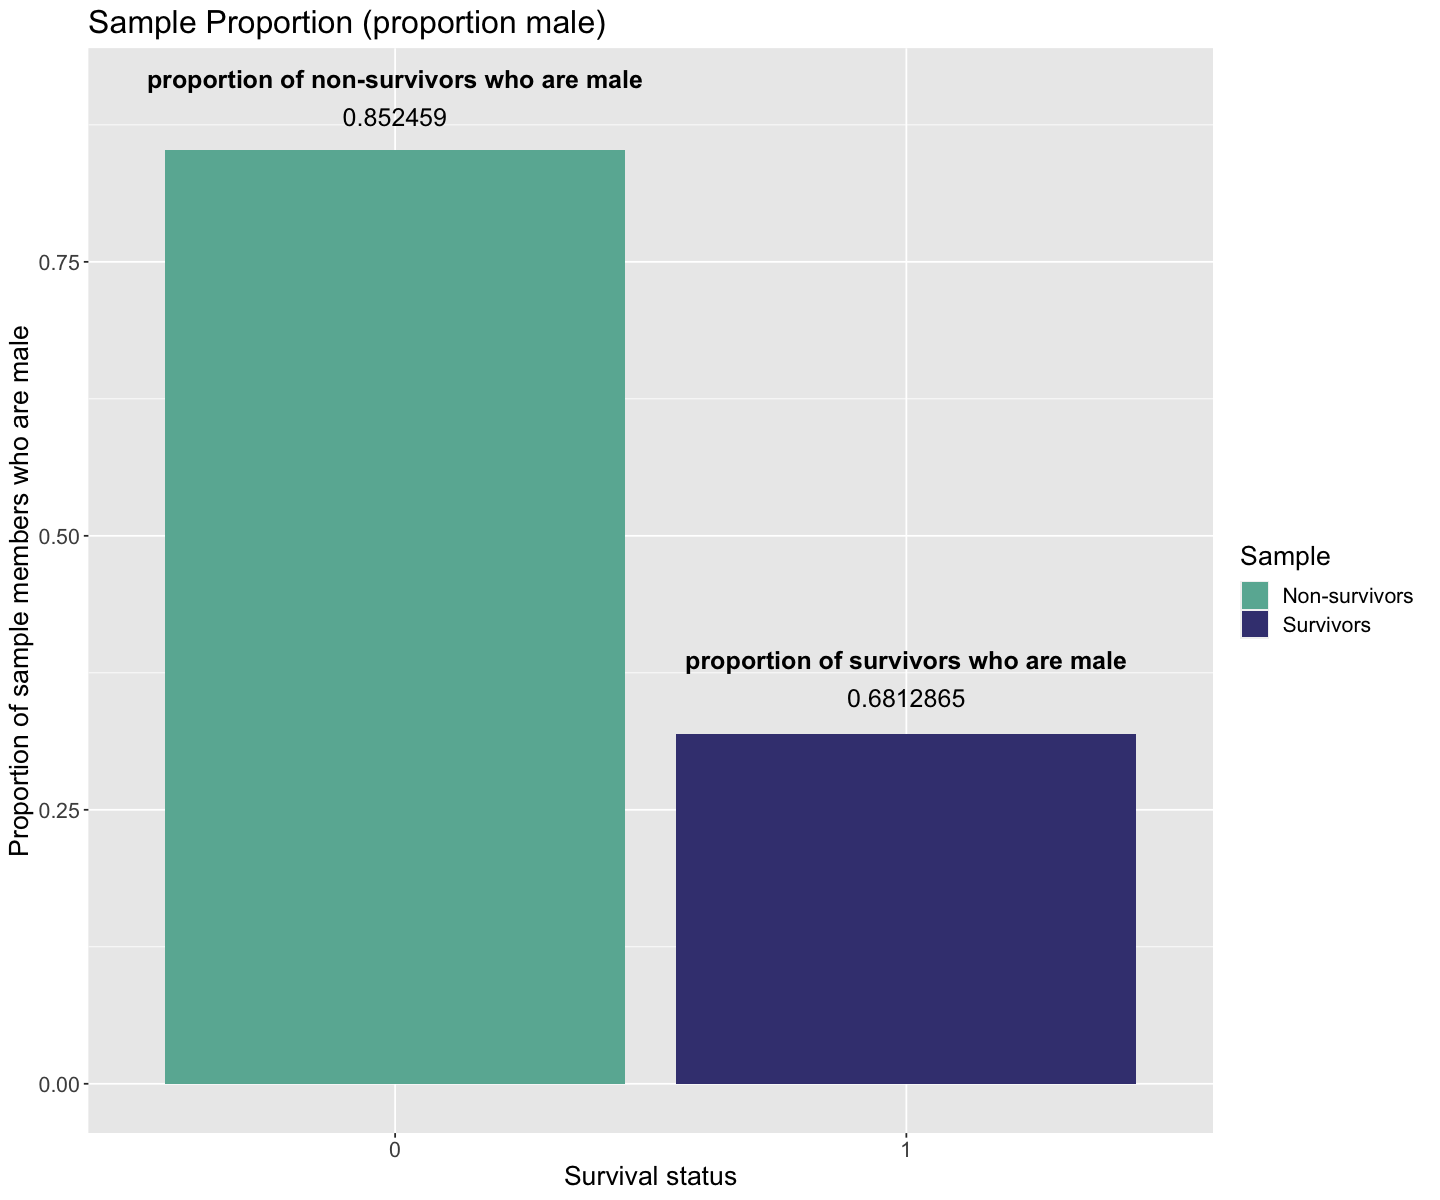

In [296]:
options(repr.plot.width = 12, repr.plot.height = 10)

#Calculate porportion of non-survivors that are male and female
prop_no_surv_male <- titanic_df %>%
    filter(survived == 0) |>
    summarize(n = sum(sex == "male") / n()) |>
    pull()

prop_surv_male <- titanic_df %>%
    filter(survived == 1) |>
    summarize(n = sum(sex == "female") / n()) |>
    pull()

titanic_df |>
    select(survived, sex) |>
    group_by(survived) |>
    summarize(prop_male = sum(sex == "male") / n()) |>
        ggplot(aes(x = survived, y = prop_male, fill = survived)) +
        geom_bar(stat = "identity") +
        annotate("text", 1, 0.9, label = paste('atop(bold("proportion of non-survivors who are male")', ',', prop_no_surv_male, ')'), size = 15/.pt, parse=TRUE) +
        annotate("text", 2, 0.37, label = paste('atop(bold("proportion of survivors who are male")', ',', prop_surv_male, ')'), size = 15/.pt, parse=TRUE) +
        scale_fill_manual(values=c("#69b3a2", "#404080"), labels=c("Non-survivors", "Survivors")) +
        labs(x = "Survival status", fill = "Sample", y = "Proportion of sample members who are male", title = "Sample Proportion (proportion male)") + 
        theme(text = element_text(size=16))

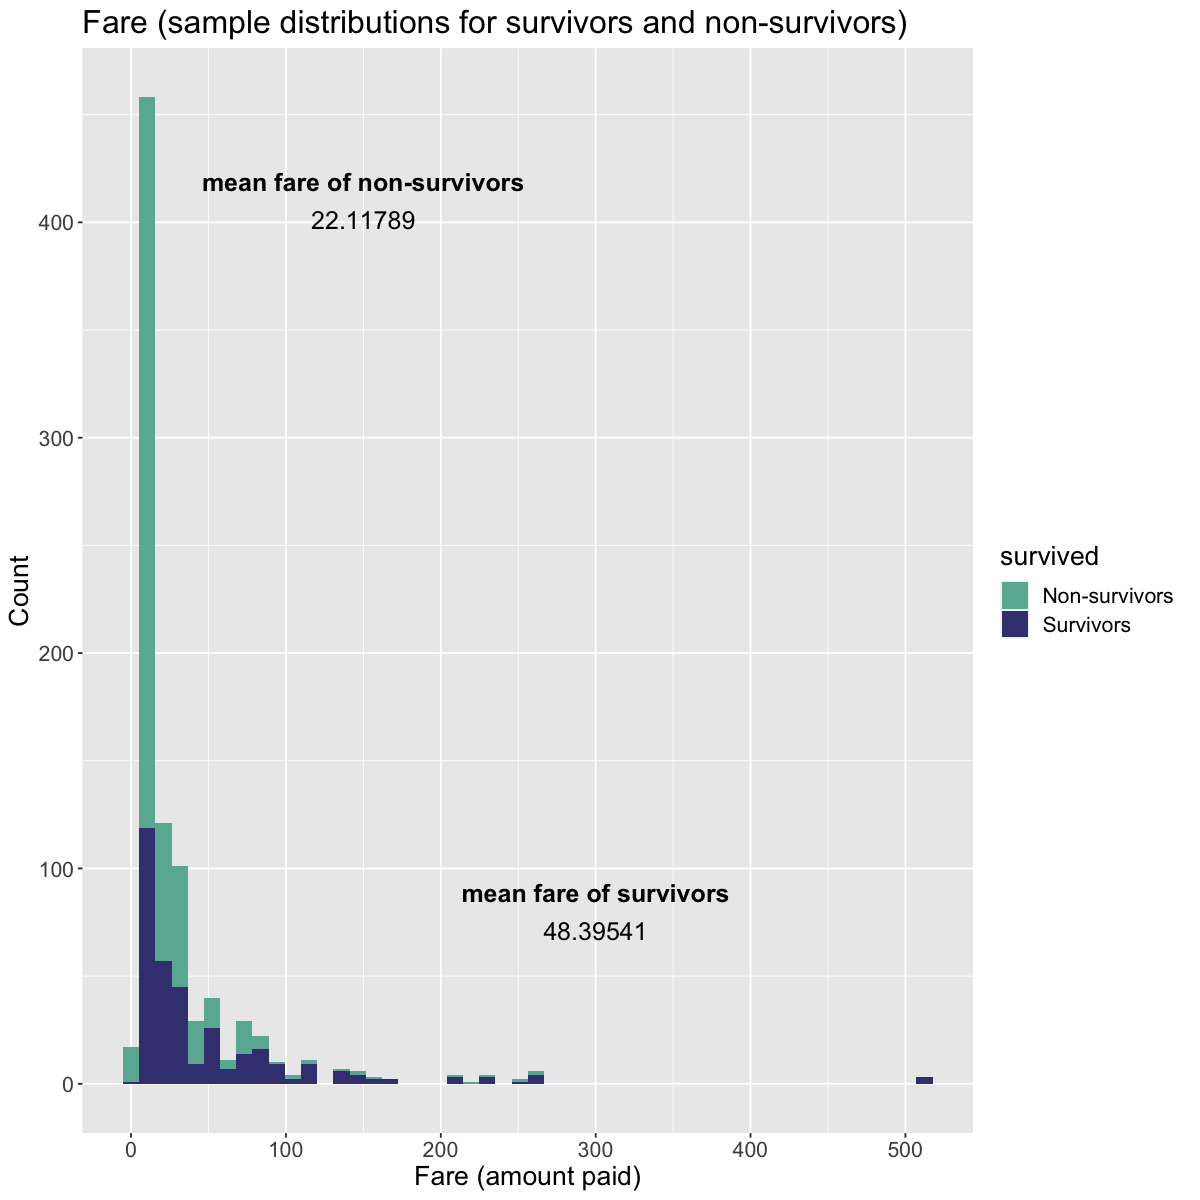

In [293]:
options(repr.plot.width = 10, repr.plot.height = 10)

mean_fare_non_surv <- titanic_df |>
    filter(survived == 0) |>
    summarize(mean = mean(fare))

mean_fare_surv <- titanic_df |>
    filter(survived == 1) |>
    summarize(mean = mean(fare))

titanic_df |>
    select(survived, fare) |> 
    drop_na() |>
    ggplot() +
    geom_histogram(aes(x = fare, fill = survived), bins=50) +
    annotate("text", 150, 410, label = paste('atop(bold("mean fare of non-survivors")', ',', mean_fare_non_surv, ')'), size = 15/.pt, parse=TRUE) +
    annotate("text", 300, 80, label = paste('atop(bold("mean fare of survivors")', ',', mean_fare_surv, ')'), size = 15/.pt, parse=TRUE) +
    labs(legend=c("h", "b")) +
    scale_fill_manual(values=c("#69b3a2", "#404080"), labels=c("Non-survivors", "Survivors")) +
    labs(x = "Fare (amount paid)", y = "Count", title="Fare (sample distributions for survivors and non-survivors)") +
    theme(text = element_text(size=16))

In [291]:
tibble(proportion_survivors_male = c(prop_no_surv_male), proportion_non_survivors_male = c(prop_surv_male));
tibble(mean_fare_survivors = c(mean_fare_non_surv), mean_fare_non_survivors = c(mean_fare_surv))

proportion_survivors_male,proportion_non_survivors_male
<dbl>,<dbl>
0.852459,0.6812865


mean_fare_survivors,mean_fare_non_survivors
<named list>,<named list>
22.11789,48.39541


<br>

<h2> Methods </h2>
The tables and plots above at least suggest that survivors and non-survivors may vary when it comes to their fare paid and gender. These findings make some sense: the classic phrase "women and children first" <a href="https://en.wikipedia.org/wiki/Women_and_children_first">(Wikipedia: Birkenhead drill)</a> explains why a disproportionate number of non-survivors were male. And, it seems plausible that wealthier passengers who bought more tickets may have been able to persuade others to help save them. However before one can make an inference about all titanic passengers, further analysis is needed. <u>We will accomplish this using 2-sample statistical tests (mean for fare, proportion for sex)</u> to determine how likely it is that the samples are from different distributions. 

<br>

<h2> References </h2>

- Bassett, V. (n.d.). Causes and Effects of the Rapid Sinking of the Titanic. Retrieved March 18, 2023, from http://www.writing.engr.psu.edu/uer/bassett.html 
- Leighly, H.P., Bramfitt, B.L. & Lawrence, S.J. RMS Titanic: A metallurgical problem. Practical Failure Analysis 1, 10–13 (2001). Retrieved March 18, 2023, from https://doi.org/10.1007/BF02715155
